In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import math

#import CSV
CS215 = pd.read_csv('/Users/katelynyu/Documents/Github/WSSS/L6_ExcelSheet.csv', low_memory= False)
CS215.head()

,TIMESTAMP,RECORD,BattV_Min,AirTC_1,AirTC_1_Avg,RH_1,RH_1_Avg,AirTC_2,AirTC_2_Avg,RH_2,...,RH_8,RH_8_Avg,AirTC_9,AirTC_9_Avg,RH_9,RH_9_Avg,AirTC_10,AirTC_10_Avg,RH_10,RH_10_Avg
0,9/28/17 7:54,0,12.97,8.53,8.51,77.15,77.10,7.934,7.929,80.60,...,73.18,73.37,8.56,8.55,75.18,75.34,8.27,8.24,79.23,79.35
1,9/28/17 7:55,1,12.96,8.55,8.54,76.39,76.59,8.010,7.999,79.83,...,72.76,72.77,8.63,8.61,74.45,74.54,8.34,8.33,78.87,78.99
2,9/28/17 7:56,2,12.97,8.59,8.59,76.78,76.65,8.050,8.050,79.52,...,72.91,72.84,8.63,8.64,74.48,74.40,8.37,8.34,78.39,78.45
3,9/28/17 7:57,3,12.97,8.63,8.63,76.49,76.62,8.110,8.090,79.37,...,73.67,73.39,8.69,8.68,74.13,73.98,8.42,8.41,78.35,78.33
4,9/28/17 7:58,4,12.97,8.69,8.67,75.84,76.03,8.150,8.140,79.29,...,74.18,74.09,8.73,8.73,73.81,73.99,8.50,8.46,78.10,78.18


In [3]:
WS= pd.read_csv('/Users/katelynyu/Documents/Github/WSSS/L6_WSSS_WeatherStationSS.csv', low_memory = False)
WS.head()

,TIMESTAMP,RECORD,BattV,PTemp_C_Avg,BP_mmHg_Avg,AirTC_WS_Avg,RH_WS,PAR_Den_Avg,PAR_Tot_Tot,LWmV_Avg,...,P_WS2_Avg,PA_WS2_Avg,VR_WS2_Avg,VWC_WS3_Avg,EC_WS3_Avg,T_WS3_Avg,P_WS3_Avg,PA_WS3_Avg,VR_WS3_Avg,Rain_mm_Tot
0,9/28/17 7:55,0,12.96,7.988,678.9,8.18,78.27,10.75,0.2149642,268.5,...,5.705,2.282,1.035,0.069,0.006,16.08,4.535,2.135,1.019,0.0
1,9/28/17 8:00,1,12.97,8.120,764.3,8.35,76.72,11.02,0.5510034,268.4,...,5.705,2.282,1.035,0.069,0.007,16.09,4.535,2.135,1.019,0.0
2,9/28/17 8:05,2,12.98,8.230,764.3,8.61,75.15,11.5,0.5749702,268.3,...,5.705,2.282,1.035,0.069,0.007,16.09,4.535,2.135,1.019,0.0
3,9/28/17 8:10,3,12.98,8.340,764.3,8.94,73.72,11.98,0.5989106,268.3,...,5.705,2.282,1.035,0.069,0.007,16.08,4.535,2.135,1.019,0.0
4,9/28/17 8:15,4,12.98,8.470,764.3,9.34,69.19,12.6,0.629964,268.3,...,5.705,2.282,1.035,0.069,0.007,16.08,4.535,2.135,1.019,0.0


In [4]:
#CS215 data
date_CS215 = CS215['TIMESTAMP']
temp1_CS215= CS215['AirTC_1_Avg']
RH1_CS215 = CS215['RH_1_Avg']
temp2_CS215= CS215['AirTC_2_Avg']
RH2_CS215 = CS215['RH_2_Avg']
temp3_CS215= CS215['AirTC_3_Avg']
RH3_CS215 = CS215['RH_3_Avg']
temp4_CS215= CS215['AirTC_4_Avg']
RH4_CS215 = CS215['RH_4_Avg']
temp5_CS215= CS215['AirTC_5_Avg']
RH5_CS215 = CS215['RH_5_Avg']
temp6_CS215= CS215['AirTC_6_Avg']
RH6_CS215 = CS215['RH_6_Avg']
temp7_CS215= CS215['AirTC_7_Avg']
RH7_CS215 = CS215['RH_7_Avg']
temp8_CS215= CS215['AirTC_8_Avg']
RH8_CS215 = CS215['RH_8_Avg']
temp9_CS215= CS215['AirTC_9_Avg']
RH9_CS215 = CS215['RH_9_Avg']
temp10_CS215= CS215['AirTC_10_Avg']
RH10_CS215 = CS215['RH_10_Avg']

#in mmHg
pressure = WS['BP_mmHg_Avg']

def barometric_eq(time, height):
    #barometric equation: p = p_0 * e**(-mgh/kT)
    p_0 = pressure[time] #mmHg
    m = .029 #kg/mol
    g = 9.8 #m/s^2
    h = height #m
    k = 8.3144598 #m2 kg s-2 K-1 mol-1
    T = temp1_CS215[time] #K 
    return p_0 * math.exp((-m*g*h)/(k*T))

#list of adjusted pressures at a specific time 

def altpressure(time, name):
    name = []
    name.append(barometric_eq(time, -2.1))
    name.append(pressure[time])
    name.append(barometric_eq(time, 2.1))
    name.append(barometric_eq(time, 4.2))
    name.append(barometric_eq(time, 6.3))
    name.append(barometric_eq(time, 8.4))
    name.append(barometric_eq(time, 10.5))
    name.append(barometric_eq(time, 12.6))
    name.append(barometric_eq(time, 14.8))
    name.append(barometric_eq(time, 17.0))
    return name

pressure200 = altpressure(200, 'pressure200')
print(pressure200)

def temp(time, name):
    name = []
    name.append(temp1_CS215[time]+273.15)
    name.append(temp2_CS215[time]+273.15)
    name.append(temp3_CS215[time]+273.15)
    name.append(temp4_CS215[time]+273.15)
    name.append(temp5_CS215[time]+273.15)
    name.append(temp6_CS215[time]+273.15)
    name.append(temp7_CS215[time]+273.15)
    name.append(float(temp8_CS215[time])+273.15)
    name.append(temp9_CS215[time]+273.15)
    name.append(temp10_CS215[time]+273.15)
    return name 

temp200 = temp(200, 'temp200')
print(temp200)


[765.97199302695174, 763.89999999999998, 761.83361181910368, 759.77281332287055, 757.71758939092035, 755.66792494377466, 753.62380494274532, 751.58521438982507, 749.45546247728703, 747.33174559992813]
[299.64999999999998, 298.63999999999999, 300.08999999999997, 300.19999999999999, 300.22999999999996, 300.25, 299.26999999999998, 300.63, 299.79999999999995, 299.47999999999996]


In [5]:
def svp(T):
    L = 2.5 * math.pow(10,6) #J/kg
    R_v = 461 #J /(kg K)
    return .611 * math.exp((L/R_v)*((1/273)-(1/T))) #saturation vapor pressure #kPa 

                           
def svplist(time, name):
    name = []
    name.append((svp(temp1_CS215[time]+273.15)) * 760/101.325)
    name.append((svp(temp2_CS215[time]+273.15))* 760/101.325)
    name.append((svp(temp3_CS215[time]+273.15))* 760/101.325)
    name.append((svp(temp4_CS215[time]+273.15))* 760/101.325)
    name.append((svp(temp5_CS215[time]+273.15))* 760/101.325)
    name.append((svp(temp6_CS215[time]+273.15))* 760/101.325)
    name.append((svp(temp7_CS215[time]+273.15))* 760/101.325)
    name.append((svp(float(temp8_CS215[time])+273.15))* 760/101.325)
    name.append((svp(temp9_CS215[time]+273.15))* 760/101.325)
    name.append((svp(temp10_CS215[time]+273.15))* 760/101.325)
    return name

svp200 = svplist(200, 'svp200')

def RH(time, name):
    name = []
    name.append(RH1_CS215[time] /100)
    name.append(RH2_CS215[time]/100)
    name.append(RH3_CS215[time]/100)
    name.append(RH4_CS215[time]/100)
    name.append(RH5_CS215[time]/100)
    name.append(RH6_CS215[time]/100)
    name.append(RH7_CS215[time]/100)
    name.append(float(RH8_CS215[time])/100)
    name.append(RH9_CS215[time]/100)
    name.append(RH10_CS215[time]/100)
    return name 

RH200 = RH(200, 'RH_200')
print(RH200)

[0.23199999999999998, 0.2732, 0.2346, 0.23100000000000001, 0.22649999999999998, 0.22440000000000002, 0.24539999999999998, 0.2278, 0.2273, 0.2379]


In [6]:
def partialpressure(RH, svp): #partial pressure of water vapor 
    return np.multiply(RH,svp)

pp_200 = partialpressure(RH200, svp200)
print(pp_200)



[ 6.22140045  6.89126865  6.46029523  6.40342173  6.29002348  6.23920778
  6.43124054  6.48000427  6.1508071   6.31441349]


[ 1.19299751  1.19445038  1.18507139  1.1813952   1.17799041  1.17469351
  1.1755514   1.16713066  1.16674957  1.16485904]


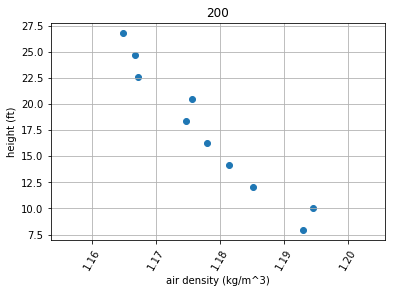

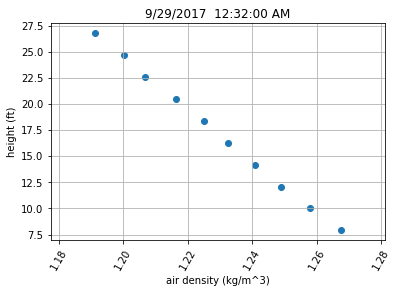

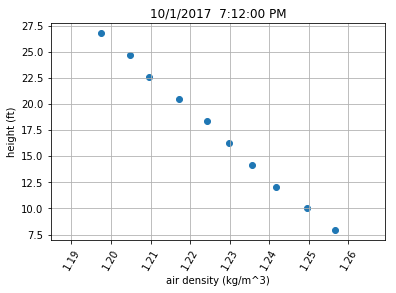

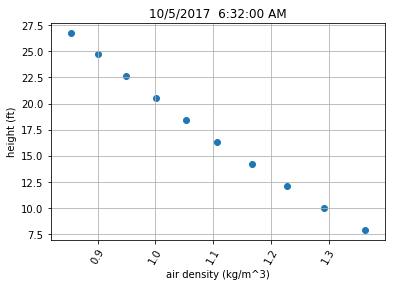

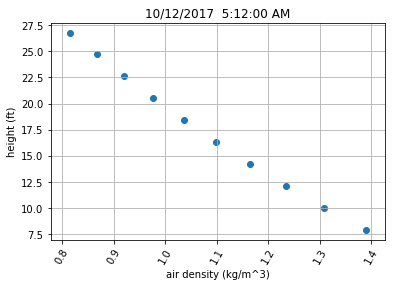

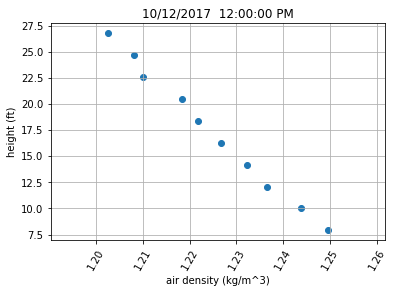

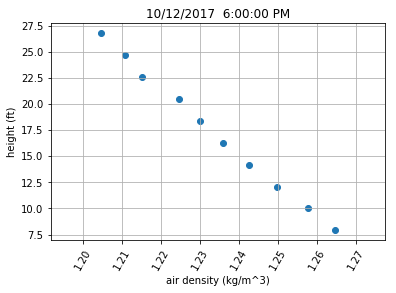

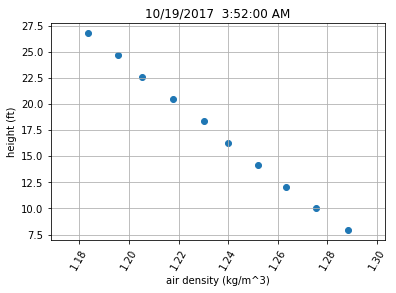

In [12]:
def airdensity(pressure, temperature, pp_w):
    #ideal gas equation: rho_humid = (rho_d * M_d + rho_v * M_v) / RT
    P = np.multiply(133.3,pressure)
    R = 8.314 #J/(K·mol)
    rho_d = P - pp_w #
    M_d = 0.028964 #kg/mol
    rho_v = np.multiply(133.3, pp_w)
    M_v = 0.018016 #kg/mol
    T = temperature #K
    return ((np.multiply(rho_d, M_d) + np.multiply(rho_v, M_v))/ np.multiply(R , T))

airdensity200 = airdensity(pressure200, temp200, pp_200)
print(airdensity200)

height = [7.9, 10, 12.1, 14.2, 16.3, 18.4, 20.5, 22.6, 24.7, 26.8]

def densityplot(title, density):
    plt.scatter(density, height)
    plt.title(title)
    plt.xlabel('air density (kg/m^3)')
    plt.ylabel('height (ft)')
    grd = plt.grid(True)
    plt.xticks(rotation= 60)
    #plt.xlim(.005, .0075)
    plt.show()

#200
densityplot('200', airdensity200)

#1000
pressure1000 = altpressure(1000, 'pressure1000')
temp1000 = temp(1000, 'temp1000')
svp1000 = svplist(1000, 'svp1000')
RH1000 = RH(1000, 'RH_1000')
pp_1000 = partialpressure(RH1000, svp1000)
airdensity1000 = airdensity(pressure1000, temp1000, pp_1000)
densityplot('9/29/2017  12:32:00 AM', airdensity1000)

#5000
pressure5000 = altpressure(5000, 'pressure5000')
temp5000 = temp(5000, 'temp5000')
svp5000 = svplist(5000, 'svp5000')
RH5000 = RH(5000, 'RH_5000')
pp_5000 = partialpressure(RH5000, svp5000)
airdensity5000 = airdensity(pressure5000, temp5000, pp_5000)
densityplot('10/1/2017  7:12:00 PM', airdensity5000)


#10000
pressure10000 = altpressure(10000, 'pressure10000')
temp10000 = temp(10000, 'temp10000')
svp10000 = svplist(10000, 'svp10000')
RH10000 = RH(10000, 'RH_10000')
pp_10000 = partialpressure(RH10000, svp10000)
airdensity10000 = airdensity(pressure10000, temp10000, pp_10000)
densityplot('10/5/2017  6:32:00 AM', airdensity10000)


#20000
pressure20000 = altpressure(20000, 'pressure20000')
temp20000 = temp(20000, 'temp20000')
svp20000 = svplist(20000, 'svp20000')
RH20000 = RH(20000, 'RH_20000')
pp_20000 = partialpressure(RH20000, svp20000)
airdensity20000 = airdensity(pressure20000, temp20000, pp_20000)
densityplot('10/12/2017  5:12:00 AM', airdensity20000)

#20408
pressure20408 = altpressure(20408, 'pressure20408')
temp20408 = temp(20408, 'temp20408')
svp20408 = svplist(20408, 'svp20408')
RH20408 = RH(20408, 'RH_20408')
pp_20408 = partialpressure(RH20408, svp20408)
airdensity20408 = airdensity(pressure20408, temp20408, pp_20408)
densityplot('10/12/2017  12:00:00 PM', airdensity20408)

#20768
pressure20768= altpressure(20768, 'pressure20768')
temp20768 = temp(20768, 'temp20768')
svp20768 = svplist(20768, 'svp20768')
RH20768 = RH(20768, 'RH_20768')
pp_20768 = partialpressure(RH20768, svp20768)
airdensity20768 = airdensity(pressure20768, temp20768, pp_20768)
densityplot('10/12/2017  6:00:00 PM', airdensity20768)

#30000
pressure30000 = altpressure(30000, 'pressure30000')
temp30000 = temp(30000, 'temp30000')
svp30000 = svplist(30000, 'svp30000')
RH30000 = RH(30000, 'RH_30000')
pp_30000 = partialpressure(RH30000, svp30000)
airdensity30000 = airdensity(pressure30000, temp30000, pp_30000)
densityplot('10/19/2017  3:52:00 AM', airdensity30000)

#37688
#pressure37688 = altpressure(37688, 'pressure37688')
#temp37688 = temp(37688, 'temp37688')
#svp37688= svplist(37688, 'svp37688')
#RH37688 = RH(37688, 'RH_37688')
#pp_37688 = partialpressure(RH37688, svp37688)
#airdensity37688 = airdensity(pressure37688, temp37688, pp_37688)
#densityplot('10/24/2017  12:00:00 PM', airdensity37688)
